# Chatper 4 Further Research Q2

### Complete all the steps in this chapter using the full MNIST datasets (for all digits, not just 3s and 7s). This is a significant project and will take you quite a bit of time to complete! You'll need to do some of your own research to figure out how to overcome obstacles you'll meet on the way.

We will use a network with:
1. 28 * 28 inputs to the first layer, one for each pixel of an image; and
2. 10 outputs in the final layer, each representing a digit between 0 and 9

We will interpret the neuron in the final layer of the network with the highest activation to be the prediction of the model.

First some setup code:

In [1]:
from fastai.vision.all import *

In [2]:
# download the dataset
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path
path.ls(), L(sorted((path/'training').ls()))

((#2) [Path('training'),Path('testing')],
 (#10) [Path('training/0'),Path('training/1'),Path('training/2'),Path('training/3'),Path('training/4'),Path('training/5'),Path('training/6'),Path('training/7'),Path('training/8'),Path('training/9')])

Next, we will define the training set and the validation set.

Given a `(x,y)` pair in the dataset, `x` will be a tensor of size 28*28 representing the pixels of the image, and `y` will be a tensor of size 10, which is 0 everywhere except for the position of the target digit.

In [3]:
# define training set
train_x = torch.cat([
    torch.stack([
        tensor(Image.open(o)) for o in p.ls()
    ]).float()/255
    for p in sorted((path/'training').ls())
]).view(-1, 28 * 28)
train_y = torch.cat([
    tensor([1 if i == int(p.name) else 0 for i in range(10)]).repeat(len(p.ls()), 1)
    for p in sorted((path/'training').ls())
]).float()
train_dl = DataLoader(list(zip(train_x, train_y)), batch_size=256)

In [4]:
# sanity check dimensions
train_x.shape, train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 10]))

<AxesSubplot: >

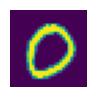

In [5]:
show_image(first(train_x).view(28,28))

In [6]:
first(train_y)

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
# define validation set
valid_x = torch.cat([
    torch.stack([
        tensor(Image.open(o)) for o in p.ls()
    ]).float()/255
    for p in sorted((path/'testing').ls())
]).view(-1, 28 * 28)
valid_y = torch.cat([
    tensor([1 if i == int(p.name) else 0 for i in range(10)]).repeat(len(p.ls()), 1)
    for p in sorted((path/'testing').ls())
]).float()
valid_dl = DataLoader(list(zip(valid_x, valid_y)), batch_size=256)

In [8]:
# define DataLoaders
dls = DataLoaders(train_dl, valid_dl)

Next we will define our metric function to evaluate the model.

In [9]:
# define metric to use to evaluate the model
def accuracy(xb, yb):
    preds = xb.max(1).indices
    targets = yb.max(1).indices
    correct = (preds == targets)
    return correct.float().mean()

We are now ready to define our `Learner` and train the model.

In [10]:
learn = Learner(
    dls=dls,
    model=nn.Sequential(
        nn.Linear(28*28,30),
        nn.ReLU(),
        nn.Linear(30,10)
    ),
    loss_func=nn.CrossEntropyLoss(),
    opt_func=SGD,
    metrics=accuracy,
)
learn.fit(50)

epoch,train_loss,valid_loss,accuracy,time
0,2.360699,2.273901,0.183600,00:00
1,2.311302,2.229590,0.247700,00:00
2,2.264664,2.179098,0.315300,00:00
3,2.218287,2.124005,0.410500,00:00
4,2.170069,2.064614,0.503300,00:00
5,2.117408,2.000633,0.569800,00:00
6,2.058214,1.932360,0.630200,00:00
7,1.991632,1.860699,0.670200,00:00
8,1.919238,1.786849,0.701600,00:00
9,1.843785,1.711872,0.717600,00:00
